# Distribuciones de probabilidad Discreta

Una distribución discreta es un concepto clave en estadística y probabilidad que describe la distribución de probabilidad de variables aleatorias que pueden tomar valores discretos o contables. En otras palabras, una distribución discreta es aquella en la que los posibles resultados de una variable son finitos o numerables.

Las características principales de una distribución discreta son:

- Valores Discretos: Los valores que puede tomar la variable aleatoria son contables y distintos. Por ejemplo, el número de caras obtenidas al lanzar un dado es una variable aleatoria discreta, ya que solo puede tomar valores enteros de 1 a 6.

- Función de Probabilidad: En una distribución discreta, la probabilidad de cada valor posible se puede determinar utilizando una función de probabilidad discreta, que asigna una probabilidad específica a cada valor de la variable aleatoria. Esta función de probabilidad se conoce como función de masa de probabilidad.

- Histograma de Barras: Para visualizar una distribución discreta, se puede utilizar un histograma de barras donde el eje horizontal representa los valores posibles de la variable y el eje vertical representa las probabilidades de esos valores.


### Distribución Uniforme

Una distribución uniforme es un tipo de distribución de probabilidad en la que todos los valores posibles de una variable aleatoria tienen la misma probabilidad de ocurrir. En otras palabras, en una distribución uniforme, todos los resultados posibles son igualmente probables.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# ahora simularemos la probabilidad de lanzamiento de un dado justo
# Evento: lanzar un dado

posibilidades = [1, 2, 3, 4, 5, 6]
n = 1_000_000

# obtenemos n valores aleatorios del arreglo de posibilidades
valores = np.random.choice(posibilidades, size=n)

# Obtener valores únicos y sus conteos
valores, conteos = np.unique(valores, return_counts=True)

# Normalizar los conteos para obtener la frecuencia relativa
frecuencia_relativa = conteos / n

print(valores)
print(frecuencia_relativa)

[1 2 3 4 5 6]
[0.16683  0.166496 0.166914 0.165896 0.167069 0.166795]


Valor: 1, Frecuencia Relativa: 16.68%
Valor: 2, Frecuencia Relativa: 16.65%
Valor: 3, Frecuencia Relativa: 16.69%
Valor: 4, Frecuencia Relativa: 16.59%
Valor: 5, Frecuencia Relativa: 16.71%
Valor: 6, Frecuencia Relativa: 16.68%


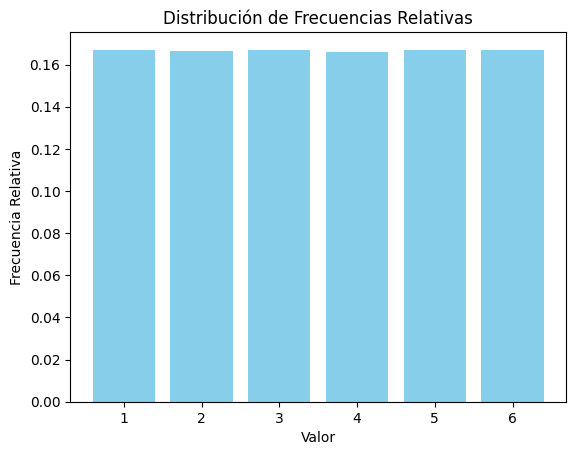

In [48]:
# Mostrar los resultados
for valor, frec_rel in zip(valores, frecuencia_relativa):
    print(f"Valor: {valor}, Frecuencia Relativa: {round(frec_rel*100,2)}%")


# Graficar la distribución de frecuencias relativas
plt.bar(valores, frecuencia_relativa, color='skyblue')
plt.xlabel('Valor')
plt.ylabel('Frecuencia Relativa')
plt.title('Distribución de Frecuencias Relativas')
plt.xticks(valores)
plt.show()


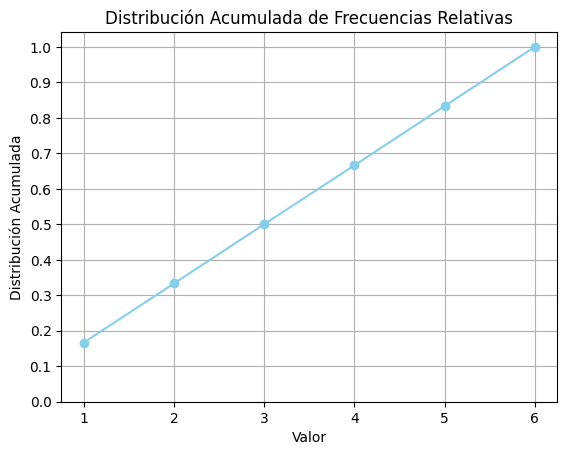

In [49]:
# Calcular la distribución acumulada de las frecuencias relativas
distribucion_acumulada = np.cumsum(frecuencia_relativa)

# Graficar la distribución acumulada
plt.plot(valores, distribucion_acumulada, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Valor')
plt.ylabel('Distribución Acumulada')
plt.title('Distribución Acumulada de Frecuencias Relativas')
plt.xticks(valores)
plt.yticks(np.arange(0, 1.1, 0.1))  # Establecer los límites del eje y de 0 a 1 con un paso de 0.1
plt.grid(True)  # Mostrar cuadrícula
plt.show()

In [50]:
# valor esperado de la distribución uniforme
# Definir el intervalo [a, b] para la distribución uniforme continua
a = 1
b = 6

# Calcular el valor esperado utilizando la fórmula
valor_esperado = (a + b) / 2
print("Valor esperado de la distribución uniforme continua:", valor_esperado)



Valor esperado de la distribución uniforme continua: 3.5


In [51]:
# dispersión de la distribución uniforme

# Definir el intervalo [a, b] para la distribución uniforme continua
a = 1
b = 6

# Calcular la varianza
varianza = ((b - a) ** 2) / 12
print("Varianza de la distribución uniforme continua:", varianza)

# Calcular la desviación estándar
desviacion_estandar = np.sqrt(varianza)
print("Desviación estándar de la distribución uniforme continua:", desviacion_estandar)

Varianza de la distribución uniforme continua: 2.0833333333333335
Desviación estándar de la distribución uniforme continua: 1.4433756729740645


**¿Cuál es la probabilidad de obtener el número 3?**

Como sabemos que el lanzamiento de un dado justo sigue una distribución de probabilidad uniforme, es decir, cada posibilidad tiene la misma probabilidad, se puede calcular de la siguiente manera.

Para la distribución uniforme discreta, la probabilidad de cada valor posible dentro de un conjunto finito de valores es igual y se calcula como:

$P(X=x_{i}) = \frac{1}{N}$
 

donde:

- $P(X=x_{i})$ es la probabilidad de que la variable aleatoria $X$ tome el valor $x_{i}$.
- $N$ es el número total de valores posibles en el conjunto.

In [ ]:
from scipy.stats import uniform

# Definir el intervalo [a, b] para la distribución uniforme continua
a = 1
b = 6

# Crear la distribución uniforme continua
distribucion_uniforme_continua = uniform(loc=a, scale=b)

# Calcular la probabilidad de obtener el valor 3 utilizando la función de distribución acumulada (CDF)
probabilidad_en_3 = distribucion_uniforme_continua.cdf(3) - distribucion_uniforme_continua.cdf(2)
print("Probabilidad de obtener 3 en una distribución uniforme continua:", probabilidad_en_3)

# También puedes calcular la probabilidad de un rango de valores utilizando la función cdf (función de distribución acumulada)
probabilidad_rango_2_a_4 = distribucion_uniforme_continua.cdf(4) - distribucion_uniforme_continua.cdf(2)
print("Probabilidad de obtener un valor en el rango [2, 4] en una distribución uniforme continua:", probabilidad_rango_2_a_4)



Probabilidad de obtener 3 en una distribución uniforme continua: 0.16666666666666666
Probabilidad de obtener un valor en el rango [2, 4] en una distribución uniforme continua: 0.33333333333333337


### Distribución No Uniforme

Supongamos el siguiente experimento en donde se lanza 3 veces una moneda, y la variable aleatoria es la cantidad de caras obtenidas.


In [53]:
def simular_lanzamiento_monedas(n_simulaciones):
    resultados = []
    for _ in range(n_simulaciones):
        # Lanzar tres monedas independientes
        lanzamientos = np.random.randint(0, 2, size=3)
        # Contar el número de caras
        caras = np.sum(lanzamientos)
        resultados.append(caras)
    return resultados

# Número de simulaciones
n_simulaciones = 10000

# Realizar simulación
resultados_simulacion = simular_lanzamiento_monedas(n_simulaciones)

# Calcular la distribución de probabilidad de los resultados
valores, conteos = np.unique(resultados_simulacion, return_counts=True)
probabilidades = conteos / n_simulaciones

# Imprimir la distribución de probabilidad
print("Resultado | Probabilidad")
for valor, probabilidad in zip(valores, probabilidades):
    print(f"{valor}         | {probabilidad:.4f}")

Resultado | Probabilidad
0         | 0.1240
1         | 0.3823
2         | 0.3683
3         | 0.1254


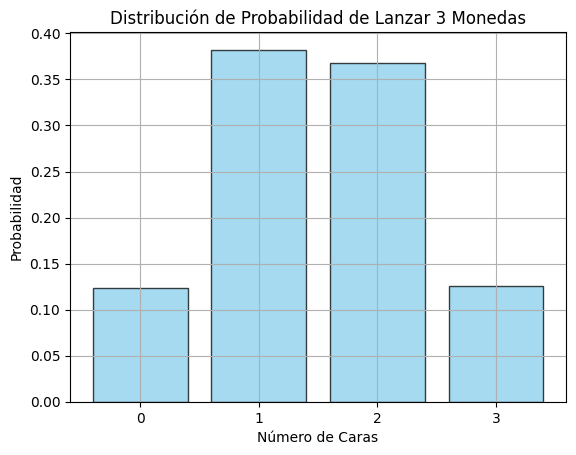

In [54]:
# Graficar la distribución de probabilidad
plt.bar(valores, probabilidades, color='skyblue', alpha=0.75, edgecolor='black')
plt.xlabel('Número de Caras')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidad de Lanzar 3 Monedas')
plt.xticks(valores)
plt.grid(True)
plt.show()